In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from matplotlib.pyplot import figure
from astropy.io import fits
from astropy.table import Table

from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import QTable

In [19]:
# this function is Lucy's way to get rid of columns that are more than 1D (pandas doesn't support that)
def Table_to_pandas(fn):
    data = fits.open(fn)
    df = QTable(data[1].data)
    cols = []
    cols_drop = []
    for i in df.columns:
        if np.size(df[i][0])==1:
            cols.append(i)
        else:
            cols_drop.append(i)
    print(cols_drop)
    return df[cols].to_pandas()

df_sdss5 = Table_to_pandas('data/astraMWMLite-0.6.0.fits')

df_sdss5 = df_sdss5[(df_sdss5['teff']>4500) & (df_sdss5['teff']<6500)]
df_sdss5 = df_sdss5[(df_sdss5['snr']>=200)]

df_sdss5_giants = df_sdss5[(df_sdss5['logg']>1.5) & (df_sdss5['logg']<3.5)]
df_sdss5_dwarfs = df_sdss5[df_sdss5['logg'] > 4]

['sdss5_target_flags']


In [20]:
stars_df = pd.read_pickle("data/stars.pkl")

In [21]:
len(stars_df)

11067

Text(0, 0.5, 'Logg')

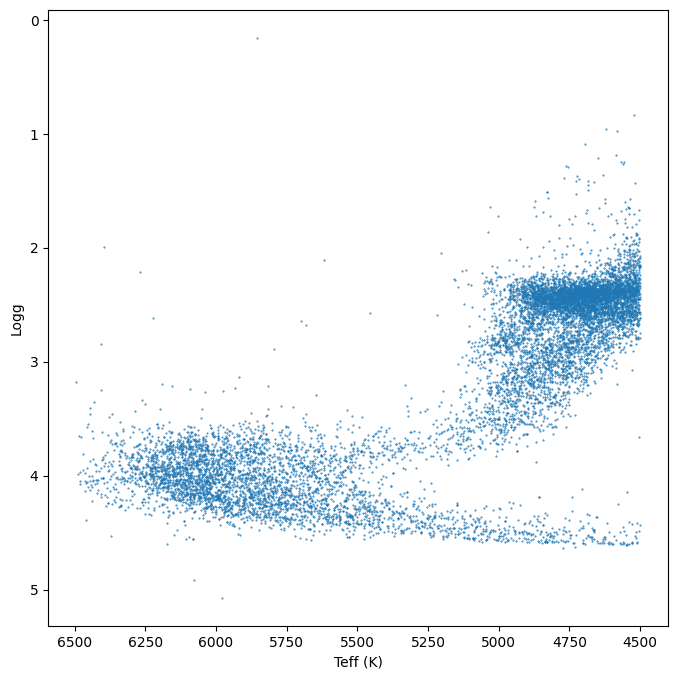

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(stars_df['teff'], stars_df['logg'], s = 0.2)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel("Teff (K)")
plt.ylabel("Logg")

In [23]:
plt.scatter(stars_df['T'])

KeyError: 'T'

In [ ]:
stars_df_giants = stars_df[(stars_df['logg'] > 1.5) & (stars_df['logg'] < 3.5)]
stars_df_dwarfs = stars_df[(stars_df['logg'] > 4)]

print("number of giants in stars_df = ", len(stars_df_giants))
print("number of dwarfs in stars_df = ", len(stars_df_dwarfs))

number of giants in stars_df =  6586
number of dwarfs in stars_df =  2522


In [ ]:
most_reliable_giants = ['c_h', 'n_h', 'o_h', 'mg_h', 
                        'al_h', 'si_h', 'mn_h', 'fe_h', 'ni_h']
reliable_giants = ['na_h', 'k_h', 'ca_h', 'co_h', 'ce_h']
less_reliable_giants = ['s_h', 'v_h', 'cr_h']

most_reliable_dwarfs = ['c_h', 'mg_h', 'si_h', 'fe_h', 'ni_h']
reliable_dwarfs = ['o_h', 'al_h', 'k_h', 'ca_h', 'mn_h']
less_reliable_dwarfs = ['n_h', 's_h']

gaia_elements = ['n_h', 'mg_h', 'si_h', 's_h', 'ca_h',
                'ti_h', 'cr_h', 'fe_h', 'ni_h', 'ce_h', 'nd_h']

In [ ]:
print("*** Gaia elements in most reliable giants: ***")
for i in range(len(most_reliable_giants)):
    if most_reliable_giants[i] in gaia_elements:
        print(f"{most_reliable_giants[i]}, mean_error = {abs(np.mean(df_sdss5_giants["e_" + most_reliable_giants[i]])):.2f} dex")

print("*** Gaia elements in reliable giants: ***")
for i in range(len(reliable_giants)):
    if reliable_giants[i] in gaia_elements:
        print(f"{reliable_giants[i]}, mean_error = {abs(np.mean(df_sdss5_giants["e_" + reliable_giants[i]])):.2f} dex")

print("*** Gaia elements in less reliable giants: ***")
for i in range(len(less_reliable_giants)):
    if less_reliable_giants[i] in gaia_elements:
        print(f"{less_reliable_giants[i]}, mean_error = {abs(np.mean(df_sdss5_giants["e_" + less_reliable_giants[i]])):.2f} dex")

*** Gaia elements in most reliable giants: ***
n_h, mean_error = 0.03 dex
mg_h, mean_error = 0.04 dex
si_h, mean_error = 0.03 dex
fe_h, mean_error = 0.02 dex
ni_h, mean_error = 0.02 dex
*** Gaia elements in reliable giants: ***
ca_h, mean_error = 0.04 dex
ce_h, mean_error = 0.05 dex
*** Gaia elements in less reliable giants: ***
s_h, mean_error = 0.02 dex
cr_h, mean_error = 0.04 dex


In [ ]:
print("*** Gaia elements in most reliable dwarfs: ***")
for i in range(len(most_reliable_dwarfs)):
    if most_reliable_dwarfs[i] in gaia_elements:
        print(f"{most_reliable_dwarfs[i]}, mean_error = {abs(np.mean(df_sdss5_dwarfs["e_" + most_reliable_dwarfs[i]])):.2f} dex")

print("*** Gaia elements in reliable dwarfs: ***")
for i in range(len(reliable_dwarfs)):
    if reliable_dwarfs[i] in gaia_elements:
        print(f"{reliable_dwarfs[i]}, mean_error = {abs(np.mean(df_sdss5_dwarfs["e_" + reliable_dwarfs[i]])):.2f} dex")

print("*** Gaia elements in less reliable dwarfs: ***")
for i in range(len(less_reliable_dwarfs)):
    if less_reliable_dwarfs[i] in gaia_elements:
        print(f"{less_reliable_dwarfs[i]}, mean_error = {abs(np.mean(df_sdss5_dwarfs["e_" + less_reliable_dwarfs[i]])):.2f} dex")

*** Gaia elements in most reliable dwarfs: ***
mg_h, mean_error = 0.05 dex
si_h, mean_error = 0.04 dex
fe_h, mean_error = 0.02 dex
ni_h, mean_error = 0.03 dex
*** Gaia elements in reliable dwarfs: ***
ca_h, mean_error = 0.05 dex
*** Gaia elements in less reliable dwarfs: ***
n_h, mean_error = 0.49 dex
s_h, mean_error = 0.03 dex
